<h1><center>Projet SES722 </center></h1>

<h1><center>Guillaume CANAT & Waly NGOM </center></h1>

<h1><center>Partie 1: Régression </center></h1>

In [1]:
#Import des librairies utiles
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##### 1. Lire le fichier mroz.raw. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

Lecture du texte descriptif des données

In [2]:
#lecture du texte descritif des données
f = open('mroz.txt', 'r')
description = f.read()
f.close;
#Affichage du texte descriptif
print(description)

MROZ.DES

inlf      hours     kidslt6   kidsge6   age       educ      wage      repwage  
hushrs    husage    huseduc   huswage   faminc    mtr       motheduc  
fatheduc  unem      city      exper     nwifeinc  lwage     expersq   

  Obs:   753

  1. inlf                     =1 if in labor force, 1975
  2. hours                    hours worked, 1975
  3. kidslt6                  # kids < 6 years
  4. kidsge6                  # kids 6-18
  5. age                      woman's age in yrs
  6. educ                     years of schooling
  7. wage                     estimated wage from earns., hours
  8. repwage                  reported wage at interview in 1976
  9. hushrs                   hours worked by husband, 1975
 10. husage                   husband's age
 11. huseduc                  husband's years of schooling
 12. huswage                  husband's hourly wage, 1975
 13. faminc                   family income, 1975
 14. mtr                      fed. marginal tax rate facing 

 Lecture et affichage  le fichier mroz.raw.

In [3]:
#Lecture du fichier 
mroz = pd.read_csv('mroz.csv',delim_whitespace=True, header=None,names=['inlf','hours','kidslt6','kidsge6',
                'age','educ','wage','repwage','hushrs','husage','huseduc','huswage','faminc','mtr','motheduc',  
                 'fatheduc','unem','city','exper','nwifeinc','lwage','expersq'])   

mroz.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [4]:
#Information sur les données
mroz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    int64  
 1   hours     753 non-null    int64  
 2   kidslt6   753 non-null    int64  
 3   kidsge6   753 non-null    int64  
 4   age       753 non-null    int64  
 5   educ      753 non-null    int64  
 6   wage      753 non-null    object 
 7   repwage   753 non-null    float64
 8   hushrs    753 non-null    int64  
 9   husage    753 non-null    int64  
 10  huseduc   753 non-null    int64  
 11  huswage   753 non-null    float64
 12  faminc    753 non-null    int64  
 13  mtr       753 non-null    float64
 14  motheduc  753 non-null    int64  
 15  fatheduc  753 non-null    int64  
 16  unem      753 non-null    float64
 17  city      753 non-null    int64  
 18  exper     753 non-null    int64  
 19  nwifeinc  753 non-null    float64
 20  lwage     753 non-null    object

In [5]:
#Remplacement des points par des zeros
mroz['wage']=mroz['wage'].replace('.','0')
mroz['lwage']=mroz['lwage'].replace('.','0')
mroz['wage']

0       3.354
1      1.3889
2      4.5455
3      1.0965
4      4.5918
        ...  
748         0
749         0
750         0
751         0
752         0
Name: wage, Length: 753, dtype: object

Sélection des observations pour lesquelles la variable wage est strictement positive.

In [6]:
#Convertion des valeurs de la variable 'wage' en float (nombre à virgule)
mroz['wage']=mroz['wage'].astype(float)
mroz['lwage']=mroz['lwage'].astype(float)

In [7]:
#Sélection des observations pour lesquelles la variable wage est strictement positive
mroz=mroz[mroz['wage']>0]
mroz.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [8]:
#Vérification des informations du nouveau dataset
mroz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      428 non-null    int64  
 1   hours     428 non-null    int64  
 2   kidslt6   428 non-null    int64  
 3   kidsge6   428 non-null    int64  
 4   age       428 non-null    int64  
 5   educ      428 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   428 non-null    float64
 8   hushrs    428 non-null    int64  
 9   husage    428 non-null    int64  
 10  huseduc   428 non-null    int64  
 11  huswage   428 non-null    float64
 12  faminc    428 non-null    int64  
 13  mtr       428 non-null    float64
 14  motheduc  428 non-null    int64  
 15  fatheduc  428 non-null    int64  
 16  unem      428 non-null    float64
 17  city      428 non-null    int64  
 18  exper     428 non-null    int64  
 19  nwifeinc  428 non-null    float64
 20  lwage     428 non-null    float6

##### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter

In [9]:
#Statistique descriptive du salaire, de l'âge et de l'éducation pour l'ensemble des femmes
WaeFemme = mroz[['wage','age','educ']]
WaeFemme.describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [10]:
#Calcul du 65eme perceptile du salaire des hommes
percentile_65 =np.percentile(mroz['huswage'], 65)
percentile_65

7.8125

In [11]:
##Statistique descriptive du salaire, de l'âge et de l'éducation pour des femmes
#dont le salaire du mari est supérieur au 65eme perceptile
Waefemmesup=(WaeFemme.loc[mroz['huswage'] > percentile_65])
Waefemmesup.describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


In [12]:
##Statistique descriptive du salaire, de l'âge et de l'éducation pour des femmes
#dont le salaire du mari est inferieur au 65eme perceptile
Waefemmesup=(WaeFemme.loc[mroz['huswage'] <= percentile_65])
Waefemmesup.describe()

,wage,age,educ
count,280.000000,280.000000,280.000000
mean,3.669390,41.682143,12.203571
std,2.458277,7.906875,2.119542
min,0.128200,30.000000,6.000000
25%,2.151600,35.000000,12.000000
50%,3.203550,41.000000,12.000000
75%,4.539500,47.000000,12.000000
max,22.500000,60.000000,17.000000


##### Commentaires:

Le salaire moyen (et médian) des femmes dont les maris ont un salaire inférieur au 65ème percentile est inférieur à celui des  autre femmes.

L'écart-type du salaire des femmes dont le mari à un salaire supérieur au 65ème percentile est plus important.

##### 3. Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme


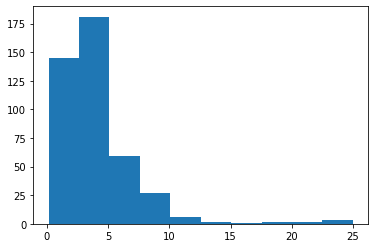

(428,)

In [13]:
#Histogramme de la variable wage
salaire=mroz['wage']
plt.hist(salaire)
plt.show();
salaire.shape

In [14]:
ecartype=np.std(mroz['wage'])
moyenne = np.mean(mroz["wage"])
borneinf = moyenne-(3*ecartype)
bornesup = moyenne+(3*ecartype)

In [15]:
salaire.drop(salaire[(mroz["wage"]<borneinf) | (mroz["wage"]>bornesup)].index, inplace=True)

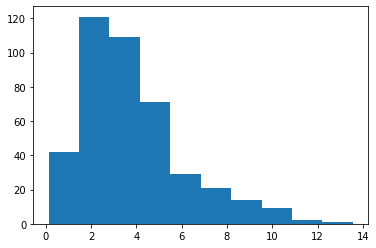

(419,)

In [16]:
#Histogramme de la variable wage
plt.hist(salaire)
plt.show();
salaire.shape

##### 4. Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.


In [17]:
np.corrcoef(mroz['motheduc'],mroz['fatheduc'])

array([[1.        , 0.55406322],
       [0.55406322, 1.        ]])

Le coefficient de correlation linéaire entre 'motheduc' et 'fatheduc' et de $0.5487$ environ.

Problème de la multi-colinéairité: si des variables sont colinéaires alors la matrice X n'est pas de plein rang et donc pas inversible. On aura donc pas de solution unique pour les paramètres du modèle.

Commentaires:Il se posera aussi un problème sur le calcul de la variance des estimateurs .

##### 5. Faites un graphique en nuage de point entre wage et educ,. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

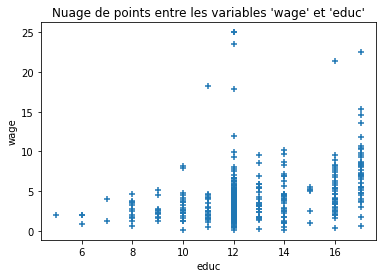

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(mroz["educ"], mroz["wage"],  marker='+')
plt.title("Nuage de points entre les variables 'wage' et 'educ'")
plt.xlabel("educ")
plt.ylabel("wage")
plt.show()

Commentaire : Pour pouvoir extraire de l'information de ce type graphique, on doit en effet supposer toute chose égale par ailleurs, cependant on voit bien que ça n'est pas le cas ici puisque pour une valeur d'educ on peut avoir de nombreuses valeurs de wage très disparates (comme par exemple pour educ = 12).

##### 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ?  Expliquer le biais de variable omise.


L’hypothèse fondamentale garantissant des estimateurs non biaisés:

1. Les variables non observées $\varepsilon$ sont de moyenne nulle i.e $ \mathbb{E}(\varepsilon)=0$.

2. Les variables observées $X$ et les variables non observées $\varepsilon$ sont non corrélées i.e $\mathbb{E}(\varepsilon|x)= 0.$

3. La matrice $X$ est de plein rang

Explication de la variable omise

On parle de biais de variable omise lorsqu’une des variables explicatives (une composante de X) corrélée à la fois avec la variable expliquée et avec le terme d’erreur n’est pas prise en compte dans l’équation. Dans ce cas, l’hypothèse fondamentale garantissant que les estimateurs MCO sont non biaisés n’est plus valide.

##### 7. Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [19]:
#Regression de wage en utilisant comme variables explicatives 
#une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6
y=mroz['lwage']
X = sm.add_constant(mroz[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])

In [20]:
model=sm.OLS(y,X)

In [21]:
resultats=model.fit()

In [22]:
print(resultats.summary())
u=resultats.resid
SSR0=u.T@u
print(SSR0)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.00e-13
Time:                        11:38:24   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

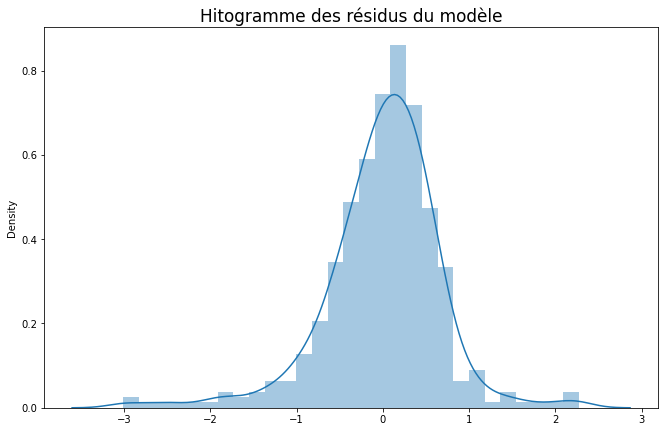

In [23]:
#histogramme des résidus
plt.figure(figsize=(11, 7))
sns.distplot(u)
plt.title("Hitogramme des résidus du modèle", fontsize=17)
plt.show()

Commentaire : la distribution des résidus a une forme quasi-gaussienne bien que l'on note une légère disymmétrie (skewness) et "longue queue" à gauche (kurtosis).

#### 8. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

Nous faisons ici le test de Student pour le $k-ième$ paramètre $\beta_k= nwifeinc$ On a:


- estimateur de $\sigma^2$ : $\hat{\sigma}^2 = \frac{1}{n-p-1}\|Y - X \beta\|^2$, avec $n$ le nombre d'observations et $p+1$ le rang de $X$ (constante inclue),

 - $\hat{s}_k^2$ = $n (X^TX)^{-1}_{k,k}$ , le $k$-ième élément de la diagonale

 - alors
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}(\hat{\beta}_{k} - \beta^{*}_{k}) \sim \mathcal{T}_{n-p-1}$$

Hypothèse nulle : $\beta^{*}_{k}=0$. On a donc la statistique de test suivante :
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}\hat{\beta}_{k} \sim \mathcal{T}_{n-p-1}$$

In [24]:
n, p = X.shape

gram = X.T.dot(X) / n

sigma_hat = np.sqrt(np.sum(u**2) / (n - p))
teta_nwifeinc = resultats.params["nwifeinc"]
s_nk = np.sqrt(pd.DataFrame(np.linalg.inv(gram), gram.columns, gram.index).loc["nwifeinc", "nwifeinc"])

t_stat = np.sqrt(n) / (s_nk * sigma_hat) * teta_nwifeinc
p_value = stats.t.sf(t_stat, n-p)*2

pd.DataFrame({"t-stat": t_stat, "p-value": p_value}, index=["results"])\
               .style.format({'t-stat': "{:.3f}", 'p-value': "{:.3f}"})

,t-stat,p-value
results,1.466,0.143


On ne rejette pas l'hypothèse $H_0$  pour un seuil de significativité de $1\%, \quad 5\%$ ou encore pour un seuil de significativité de $10\%.$

##### 9.Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

Nous avons ici l'hypothèse: ${\bf \{ \theta_{nwifeinc} = 0.01 \}}$

Sous cette hypothèse, on a $ \frac{n^{\frac{1}{2}}}{\hat{s}_{n,k}^{\frac{1}{2}}\hat{\sigma}_n}(\hat{\theta}_{nwifeinc} - 0.01)\sim \mathcal{T}_{n-p-1}$

In [25]:
t_stat = np.sqrt(n) / (s_nk * sigma_hat) * (teta_nwifeinc - 0.01)
p_value = stats.t.sf(np.abs(t_stat), n-p)*2

pd.DataFrame({"t-stat": np.abs(t_stat), "p-value": p_value}, index=["results"])\
               .style.format({'t-stat': "{:.3f}", 'p-value': "{:.3f}"})

,t-stat,p-value
results,1.536,0.125


La p-value du test est de $0.125$, le test de significativité à $5\%$ n’est donc pas rejetté.

##### 10. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

Nous avons un modèle initial: 

$log(wage)= \beta_0 + \beta_{city}*city + \beta_{educ}*educ + \beta_{exper}*exper +\beta_{nwifeinc}*nwifeinc+
\beta_{kidslt6}*kidslt6+\beta_{kidsge6}*kidsge6$

Sous l'hyppothèse,

$H_0=\{ \beta_{nwifeinc}=0.01 , \beta_{city}=0.05 \}$, nous allons appliquer le test de Fisher au modèle

$log(wage)= \beta_0 + 0.05*city + \beta_{educ}*educ + \beta_{exper}*exper + 0.01*nwifeinc+
\beta_{kidslt6}*kidslt6+\beta_{kidsge6}*kidsge6, $ c'est à dire à:

$log(wage)- 0.05*city-  0.01*nwifeinc=\beta_0 + \beta_{educ}*educ + \beta_{exper}*exper +
\beta_{kidslt6}*kidslt6+\beta_{kidsge6}*kidsge6.$

Le statistique de Fisher associée a ces deux modèles est:


$f_{stat} = \frac{\frac{SSE_1-SSE}{2}}{\frac{SSE}{n-p-1}}$

In [26]:
# --- fit linear regression model with all variables --- #

X = sm.add_constant(mroz[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid

SSE = np.sum(residual**2)

# --- fit regression model with 2 constraints on beta coefficients --- #

X = sm.add_constant(mroz[['educ', 'exper', 'kidslt6', 'kidsge6']])
y = mroz["lwage"] - 0.05*mroz["city"] - 0.01*mroz["nwifeinc"]

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid

SSE1 = np.sum(residual**2)


# --- Compute Fisher Stat --- #

f_stat = ((SSE1 - SSE) / 2)  /  (SSE / (n - p))
p_value = stats.f.sf(f_stat, 2, n - p)

pd.DataFrame({'f-stat': f_stat, 'p-value': p_value}, index=['results'])\
               .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})

,f-stat,p-value
results,1.337,0.264


La p-valeur du test est $ 0.264$, l’hypothèse $H_0=\{ \beta_{nwifeinc}=0.01 , \beta_{city}=0.05 \}$ est donc acceptée.

##### 11. Tester l’hypothèse joint que $H_0=\{ \beta_{nwifeinc}+\beta_{city}=0.1, \beta_{educ}+\beta_{exper}=0.1 \}$

L'hypothèse jointe peut encore s'écrire:

$$
\left \{
\begin{array}{c c}
    \beta_{nwifeinc} &= 0.1- \beta_{city} \\
   \beta_{educ} &= 0.1 -  \beta_{exper}
\end{array}
\right.
$$

Le modèle initial devient:

$log(wage)= \beta_0 + \beta_{city}*city + {\bf (0.1 -  \beta_{exper})}*educ + \beta_{exper}*exper +{\bf (0.1- \beta_{city})}*nwifeinc+ \beta_{kidslt6}*kidslt6+\beta_{kidsge6}*kidsge6$, c'est à dire :


$log(wage)- 0.1*educ -0.1*nwifeinc= \beta_0 + \beta_{city}(city-nwifeinc) + \beta_{exper}*(exper-educ)+  \beta_{kidslt6}*kidslt6+\beta_{kidsge6}*kidsge6$

Et du coup, La statistique de Fisher associé a ces deux modèles est:


$f_{stat} = \frac{\frac{SSE_1-SSE}{2}}{\frac{SSE}{n-p-1}}$

In [27]:
# --- fit linear regression model with all variables --- #

X = sm.add_constant(mroz[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid

SSE = np.sum(residual**2)

# --- fit regression model with 2 constraints on beta coefficients --- #

X = sm.add_constant(mroz[['kidslt6', 'kidsge6']])
X['city_nwfeinc'] = mroz['city'] - mroz['nwifeinc']
X['exper_educ'] =  mroz['exper'] - mroz['educ']
y = mroz['lwage'] - 0.1*mroz['educ'] - 0.1*mroz['nwifeinc']

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid

SSE1 = np.sum(residual**2)


# --- Compute Fisher Stat --- #

f_stat = ((SSE1 - SSE) / 2)  /  (SSE / (n - p))
p_value = stats.f.sf(f_stat, 2, n - p)

pd.DataFrame({"f-stat": f_stat, "p-value": p_value}, index=["results"])\
               .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})

,f-stat,p-value
results,0.923,0.398


La p-valeur du test est $0.398,$ , l'hypothèse $H_0=\{ \beta_{nwifeinc}+\beta_{city}=0.1, \beta_{educ}+\beta_{exper}=0.1 \}$ est donc acceptée.

##### 12.  Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez


Nous faisons ici:

1. une représentation de wage (estimated wage from earns., hours) en fonction de  exper selon que le niveau d'éducation soit inférieur ou supérieur à la valeur médiane de la varibale "educ" (On peut le faire avec chaque quartile).

2. une représentation de repwage (reported wage at interview in 1976) en fonction de  exper selon que le niveau d'éducation soit inférieur ou supérieur à la valeur médiane de la varibale "educ" .

3.  une représentation (dans l'espace à trois dimensions) de wage en fonction de educ et exper.

4.  une représentation (dans l'espace à trois dimensions) de repwage en fonction de educ et exper.

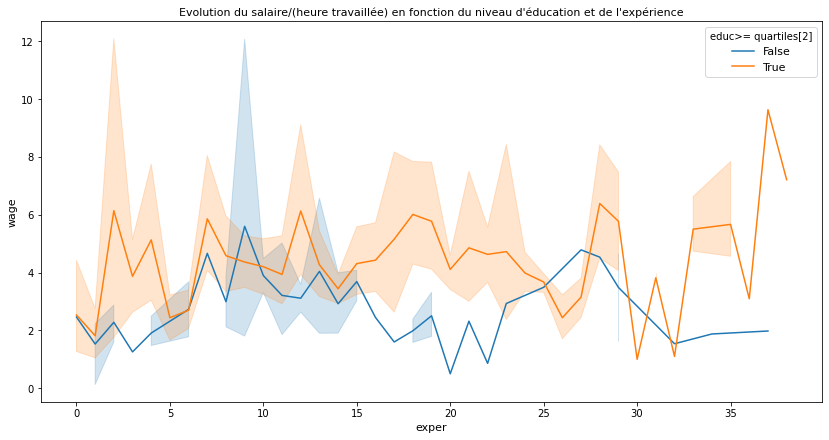

In [28]:
quartiles = [np.percentile(mroz['huseduc'],q) for q in [0, 25, 50, 75, 100]]
df = mroz.copy()
df["educ>= quartiles[2]"] = df.educ>= quartiles[2]
_, axes = plt.subplots( figsize=(14, 7))

with sns.plotting_context(rc={"legend.fontsize":11}):
    sns.lineplot(x="exper", y="wage", hue="educ>= quartiles[2]", data=df, ax=axes)
    plt.xlabel("exper", fontsize=11)
    plt.ylabel("wage", fontsize=11)
    
axes.set_title("Evolution du salaire/(heure travaillée) en fonction du niveau d'éducation et de l'expérience",
                  fontsize=11)

plt.show()

a. On constate que le salaire "wage" est plus corrélé au niveau d'éducation qu'à l'expérience professionnelle tandis "repwage" est plus corrélé à l'expérience professionnelle. On peut  d'ailleurs le voir aussi en chiffres avec la matrice de covariance ci-dessous

b. En debut et en fin de carrière, on constate que le niveau d'éducation a une forte influence sur le salaire

c. Entre 8 ans et 13 ans d'expérience, le niveau d'éducation n'a pas beaucoup d'influence .

d. Par ailleurs, pour les personnes qui ont un niveau d'éducation supérieur  à la valeur médiane de la variable "educ", le salaire croit fortement avec l'expérience à l'opposé des personnes ayant un niveau d'éducation inférieur à cette valeur médiane. 

In [29]:
df[["wage","educ","exper"]].cov()

,wage,educ,exper
wage,10.957969,2.586967,1.466479
educ,2.586967,5.222942,-0.279958
exper,1.466479,-0.279958,64.897897


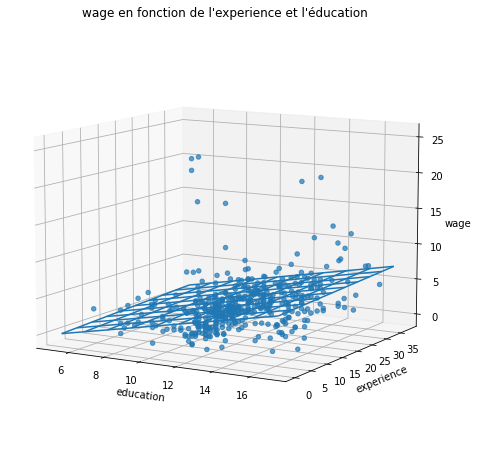

In [30]:
X = df[["educ", "exper"]]
X = sm.add_constant(X)
y = df["wage"]
model = sm.OLS(y, X)
results = model.fit()

xx = np.linspace(df["educ"].min(), df["educ"].max(),10)
yy = np.linspace(df["exper"].min(), df["exper"].max(),10)
xx, yy = np.meshgrid(xx, yy)

exog = np.column_stack((xx.ravel(), yy.ravel()))
exog = sm.add_constant(exog)

zz = model.predict(params=results.params, exog=exog).reshape(xx.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
#ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot_wireframe(xx,yy,zz)
ax.scatter(df["educ"], df["exper"], df["wage"], alpha=0.7)
ax.set_xlabel('education')
ax.set_ylabel('experience')
ax.set_zlabel('wage')
ax.view_init(10, -60)
ax.set_title("wage en fonction de l'experience et l'éducation")
plt.show()

In [31]:
print(f"Coéfficients de regression :\n{results.params}")

Coéfficients de regression :
const   -2.431687
educ     0.496634
exper    0.024739
dtype: float64


On peut remarquer que le coéfficient de l'hyperplan de regression est plus important sur l'axe educ que sur l'axe exper.

##### 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

Cette question revient à tester l'hypothèse ${\bf H_0} = \{ \beta_{kidsgt6}= \beta_{kidst6} \}=\{\theta:= \beta_{kidsgt6}- \beta_{kidst6}=0 \}.$


Sous cette hypothèse, le modèle initial devient:

$log(wage)= \beta_0 + \beta_{city}*city + \beta_{educ}*educ + \beta_{exper}*exper +\beta_{nwifeinc}*nwifeinc+
 \beta_{kidslt6}*(kidslt6+kidsge6)+ \theta*kidsge6$



Sous cette hypothèse, on a $ \frac{n^{\frac{1}{2}}}{\hat{s}_{n,k}^{\frac{1}{2}}\hat{\sigma}_n}\hat{\theta} \sim \mathcal{T}_{n-p-1}$

In [32]:
X = sm.add_constant(mroz[['city', 'educ', 'exper', 'nwifeinc','kidsge6']])
X['kidslt6_kidsge6'] = mroz['kidslt6']+ mroz['kidsge6']
n,p=X.shape
y = mroz['lwage']

lastmodel=sm.OLS(y,X)
resultats=lastmodel.fit()
gram = X.T.dot(X) / n
u=resultats.resid
sigma_hat = np.sqrt(np.sum(u**2) / (n - p))
theta =resultats.params['kidsge6']
s_nk = np.sqrt(pd.DataFrame(np.linalg.inv(gram), gram.columns, gram.index).loc['kidsge6', 'kidsge6'])


t_stat = np.sqrt(n) / (s_nk * sigma_hat) * theta
p_value = stats.t.sf(np.abs(t_stat), n-p)*2

pd.DataFrame({"t-stat": np.abs(t_stat), "p-value": p_value}, index=["results"])\
               .style.format({'t-stat': "{:.3f}", 'p-value': "{:.3f}"})

,t-stat,p-value
results,0.372,0.710


Avec cette p-value, on ne rejette donc pas l'hypothèse $H_0$ au seil de $5\%.$

On peut dire ici que l'âge des enfants ( moins de 6 ans ou entre 6 ans et 18 ans) n'aurait pas d'influence dans ce modèle.

###### 14.  Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [33]:
#test d'hétéroscédasticité
X = sm.add_constant(mroz[['city','educ','exper','nwifeinc','kidslt6','kidsge6']])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
resultats = model.fit()


residual = resultats.resid
model_heterosc = sm.OLS(residual**2, X)
resultats_heterosc = model_heterosc.fit()

SSE = np.sum(resultats_heterosc.resid**2)

SSE1 = np.var(residual**2) * n

# --- Compute Fisher Stat --- #

f_stat = ((SSE1 - SSE) / 6)  /  (SSE / (n - p))
p_value = stats.f.sf(f_stat, 6, n - p)

pd.DataFrame({"f-stat": f_stat, "p-value": p_value}, index=["results"])\
                  .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})


,f-stat,p-value
results,2.009,0.063


On ne peut donc pas rejeter l'hypothèse d'homoscédasticité. Mais vu la p-value,il existe des sources d'héteroscédasticité.


Observons l’hétéroscédasticité coefficient par coefficient avec un test de Student:

In [34]:
print(resultats_heterosc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Tue, 10 May 2022   Prob (F-statistic):             0.0633
Time:                        11:38:25   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

On remarque que la variable exper est significative. Pour y voir plus clair, traçcons les courbes des résidus en fonction de quelques grandeurs (les coefficients et les valeurs estimées).

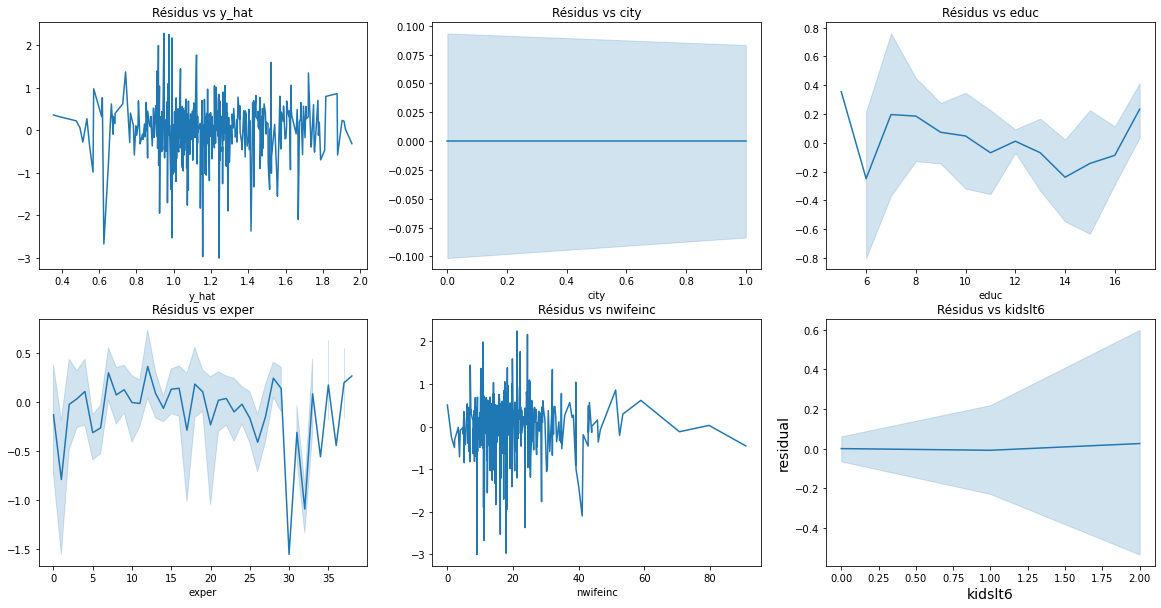

In [35]:
# Revoir!!!!
X = sm.add_constant(mroz[['city','educ','exper','nwifeinc','kidslt6','kidsge6']])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
resultats = model.fit()


residual = resultats.resid
mroz['y_hat']=resultats.predict(X)

#y_hat = resultats.predict(X)
abscisses= [['y_hat','city','educ'],['exper','nwifeinc','kidslt6']]

_, axes = plt.subplots(2, 3, figsize=(20, 10))


for i in range(2):
    for j in range(3):
        sns.lineplot(x=mroz[abscisses[i][j]],y=residual,data=mroz,ax=axes[i][j])
        plt.xlabel(abscisses[i][j], fontsize=14)
        plt.ylabel("residual", fontsize=14)
        axes[i][j].set_title(f"Résidus vs %s" %abscisses[i][j])
plt.show()

En observant les p-valeurs obtenues  coefficient par coefficient, on voit que exper est significatif.

Nous corrigeons l'hétéroscédasticité en enlevant les outliers (On peut aussi penser à une Weight least square)

In [36]:
# mask booléen : valeur absolue de l'écart entre l'observation et la moyenne
mroz.drop(mroz[(mroz["wage"]<borneinf) | (mroz["wage"]>bornesup)].index, inplace=True)
mroz.shape

(419, 23)

In [37]:
X = sm.add_constant(mroz[['city','educ','exper','nwifeinc','kidslt6','kidsge6']])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
resultats = model.fit()


residual = resultats.resid
model_heterosc = sm.OLS(residual**2, X)
resultats_heterosc = model_heterosc.fit()

SSE = np.sum(resultats_heterosc.resid**2)

SSE1 = np.var(residual**2) * n

# --- Compute Fisher Stat --- #

f_stat = ((SSE1 - SSE) / 6)  /  (SSE / (n - p))
p_value = stats.f.sf(f_stat, 6, n - p)

pd.DataFrame({"f-stat": f_stat, "p-value": p_value}, index=["results"])\
                  .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})

,f-stat,p-value
results,1.413,0.208


In [38]:
print(resultats_heterosc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.413
Date:                Tue, 10 May 2022   Prob (F-statistic):              0.208
Time:                        11:38:27   Log-Likelihood:                -556.50
No. Observations:                 419   AIC:                             1127.
Df Residuals:                     412   BIC:                             1155.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2711      0.289      0.938      0.3

###### 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs


Nous allons tester l'égalité de l'ensemble des coefficients sur le modèle 

$log(wage)= \beta_0 + \beta_{city}*city + \beta_{educ}*educ + \beta_{exper}*exper +\beta_{nwifeinc}*nwifeinc+
 \beta_{kidslt6}*(kidslt6+kidsge6)+ \theta*kidsge6$
 
 pour deux groupes d'indicidus: 
 
 - Le groupe dont l'âge $\leq 43$ ans.
 
 - Le goupe dont l'âge $> 43$ ans.
 
 Nous commençons faire une regression de l'ensemble des individus puis une regression pour chaque groupe d'individus.

1. regression pour l'ensemble des individus

In [39]:
X = sm.add_constant(mroz[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]])
y = mroz['lwage']
n, p = X.shape

model = sm.OLS(y, X)
resultats = model.fit()

# Somme des carrés des residus pour l'ensemble
SSE_ens = np.sum(resultats.resid**2)

2. Regression pour le groupe dont l'âge est $\leq 43$ ans 

In [40]:
X = sm.add_constant(mroz.loc[mroz.age <= 43, ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]])
y = mroz.loc[mroz.age <= 43, 'lwage']

model = sm.OLS(y, X, hasconst=True)
results = model.fit()

# Somme des carrés des residus pour ce groupe 
SSE1 = np.sum(results.resid**2)

3. Regression pour le groupe dont l'âge est $> 43$ ans 

In [41]:
X = sm.add_constant(mroz.loc[mroz.age > 43, ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]])
y = mroz.loc[mroz.age > 43, 'lwage']

model = sm.OLS(y, X, hasconst=True)
resultats = model.fit()

# Somme des carrés des residus pour ce groupe 
SSE2 = np.sum(resultats.resid**2)

Calcul de la statistique 

In [42]:
f_stat = ((SSE_ens-(SSE1+SSE2)) / p)  / ((SSE1+SSE2)/(n-2*p))
p_value = stats.f.sf(f_stat, p, n-2*p)                   
    
pd.DataFrame({"f-stat": f_stat, "p-value": p_value}, index=["results"])\
               .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})

,f-stat,p-value
results,0.862,0.537


On ne rejette pas l'hypothèse nulle. Il n'ya donc pas de changement de structure

###### 16. Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez

##### a. Ajouter au modèle de la question 7 la variable huseduc

In [43]:
y=mroz['lwage']
s = np.shape(df['wage'])
constante = np.ones(s)
X = sm.add_constant(mroz[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6','huseduc']])

In [44]:
model= sm.OLS(y,X)
resultats=model.fit()
print(resultats.summary())
u=resultats.resid
SSR0=u.T@u
print(SSR0)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     12.50
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.53e-14
Time:                        11:38:27   Log-Likelihood:                -391.67
No. Observations:                 419   AIC:                             799.3
Df Residuals:                     411   BIC:                             831.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4025      0.198     -2.029      0.0

 ###### b. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix

In [45]:
#Décomposition de la variable 'huseduc' en 4 variables binaires selon ses quartiles
quartiles = [np.percentile(mroz['huseduc'],q) for q in [0, 25, 50, 75, 100]]

masks = np.empty((mroz.shape[0], 4))
for i in range(len(quartiles)-1):
    masks[:, i] = (mroz["huseduc"]>=quartiles[i]) & (mroz["huseduc"]<quartiles[i+1])

huseduc_decompose = pd.DataFrame(data=masks, columns=["huseduc_0_25", "huseduc_25_50", "huseduc_50_75",
                                                   "huseduc_75_1"])

In [46]:
# Regression
df1=mroz[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]].reset_index()
df1=df1.drop('index', axis=1)
X = sm.add_constant(pd.concat([df1,huseduc_decompose],ignore_index=False,axis=1))

y = mroz["lwage"].reset_index().drop('index', axis=1)

model = sm.OLS(y, X)
resultats = model.fit()
residual = resultats.resid
print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     8.991
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.00e-13
Time:                        11:38:27   Log-Likelihood:                -390.37
No. Observations:                 419   AIC:                             802.7
Df Residuals:                     408   BIC:                             847.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6632      0.271     -2.443

##### c.  Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez


La statistique de Fisher associé  est:

$f_{stat} = \frac{\frac{SSE_1-SSE}{4}}{\frac{SSE}{n-p-1}}$

In [47]:
#Modèle sans contrainte
df1=mroz[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]].reset_index()
df1=df1.drop('index', axis=1)
X = sm.add_constant(pd.concat([df1,huseduc_decompose],ignore_index=False,axis=1))

y = mroz["lwage"].reset_index().drop('index', axis=1)

model = sm.OLS(y, X)
resultats = model.fit()
residual = resultats.resid
SSE = np.sum(residual**2)

#Modèle contraint
X = sm.add_constant(df1)
y = mroz["lwage"].reset_index().drop('index', axis=1)

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid

SSE1 = np.sum(residual**2)


# --- Compute Fisher Stat --- #

f_stat = ((SSE1 - SSE) / 4)  /  (SSE / (n - p))
p_value = stats.f.sf(f_stat, 4, n - p)

pd.DataFrame({"f-stat": f_stat, "p-value": p_value}, index=["results"])\
               .style.format({'f-stat': "{:.3f}", 'p-value': "{:.3f}"})


,f-stat,p-value
results,0.894,0.468


On ne peut alors pas rejeter l'hypothèse de non significativité de l'ensemble des  variables binaires.

<h1><center>Partie 2: Séries temporelles </center></h1>

##### 1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [48]:
df = pd.read_excel('quarterly.xls')
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      212 non-null    object 
 1   FFR       212 non-null    float64
 2   Tbill     212 non-null    float64
 3   Tb1yr     212 non-null    float64
 4   r5        212 non-null    float64
 5   r10       212 non-null    float64
 6   PPINSA    212 non-null    float64
 7   Finished  212 non-null    float64
 8   CPI       212 non-null    float64
 9   CPICORE   212 non-null    float64
 10  M1NSA     212 non-null    float64
 11  M2SA      212 non-null    float64
 12  M2NSA     212 non-null    float64
 13  Unemp     212 non-null    float64
 14  IndProd   212 non-null    float64
 15  RGDP      212 non-null    float64
 16  Potent    212 non-null    float64
 17  Deflator  212 non-null    float64
 18  Curr      212 non-null    float64
dtypes: float64(18), object(1)
memory usage: 31.6+ KB


In [50]:
#Vérification de valeurs manquantes
df.isnull().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

##### 2. Stationnariser la série de CPI en utilisant la méthode de régression qui inclue un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, ...)

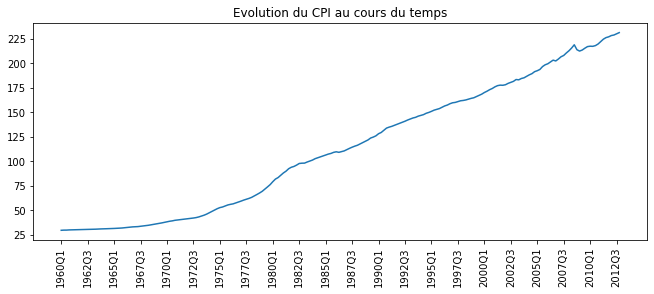

In [51]:
plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("Evolution du CPI au cours du temps")
plt.show()

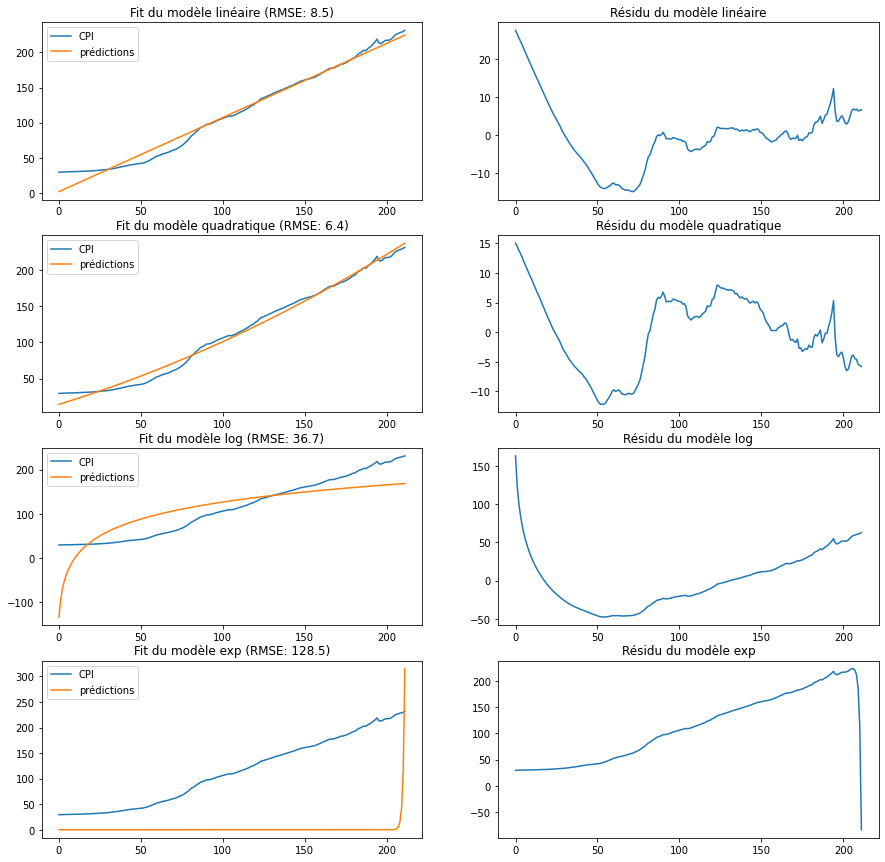

In [52]:
from sklearn.metrics import mean_squared_error

X = np.arange(1, len(df)+1)
y = df["CPI"]
func_type = ["linéaire", "quadratique", "log", "exp"]
X_list = [X, np.column_stack((X, X**2)), np.log(X), np.exp(X)]

fig, axes = plt.subplots(len(func_type), 2, figsize=(15, 15))
all_preds = []

for i, X in enumerate(X_list):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    preds = model.predict(results.params)
    all_preds.append(preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    axes[i, 0].plot(y, label="CPI")
    axes[i, 0].plot(preds, label="prédictions")
    axes[i, 0].set_title(f"Fit du modèle {func_type[i]} (RMSE: {rmse:.1f})")
    axes[i, 0].legend()
    axes[i, 1].plot(results.resid)
    axes[i, 1].set_title(f"Résidu du modèle {func_type[i]}")

plt.show()

La méthode de regression avec la tendance quadratique semble la mieux adaptée (RMSE plus petite).

##### 3. Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.


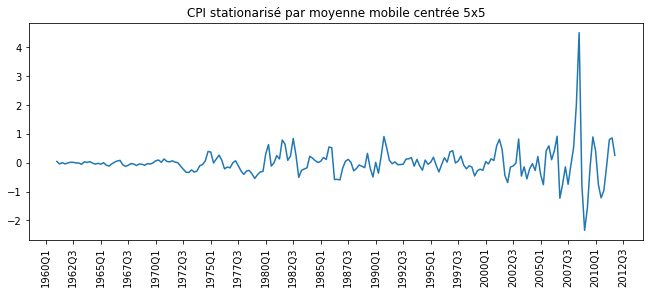

In [53]:
weights = np.array([1/25, 2/25, 3/25, 4/25, 5/25, 4/25, 3/25, 2/25, 1/25])
df.loc[:, "CPI_rollmean"] = df["CPI"].rolling(9, center=True).apply(lambda x: np.sum(weights*x))

plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"] - df["CPI_rollmean"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("CPI stationarisé par moyenne mobile centrée 5x5")
plt.show()

##### 4. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.


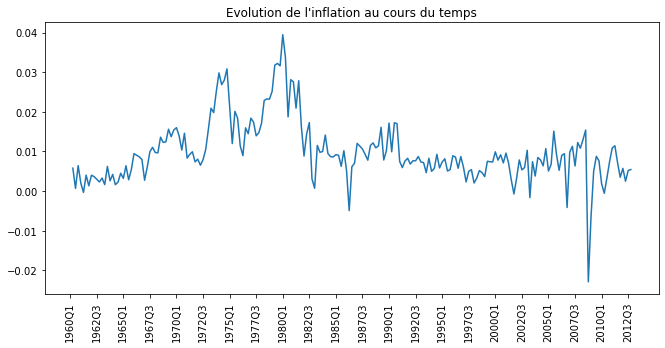

In [54]:
df.loc[:, "inf"] = df["CPI"] / df["CPI"].shift(1) - 1
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"])
plt.title("Evolution de l'inflation au cours du temps")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

#### 5. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

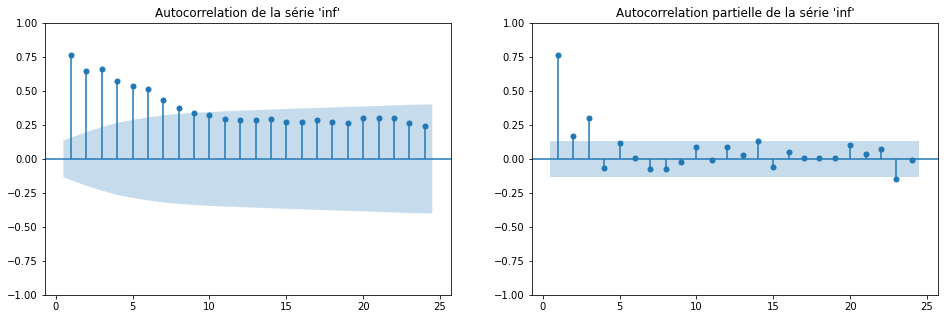

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

inf = df["inf"].dropna()
fig, axes = plt.subplots(1, 2, figsize=(16,5))
plot_acf(inf, ax=axes[0], zero=False, title="Autocorrelation de la série 'inf'")
plot_pacf(inf, ax=axes[1], zero=False, title="Autocorrelation partielle de la série 'inf'")
plt.show()

* Autocorrelation d'ordre $h$ : $\rho(h) = \frac{\gamma(h)}{\gamma(0)}$ avec $\gamma(h) = \text{cov}(Y_t, Y_{t+h})$
* Autocorrelations partielles = coéfficients de la regression linéaire sur les lags considérés (ici 25) pour prédire la valeur au temp $t$.

##### 6. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".


* Stationarité stricte : la distribution jointe de $(Y_{t+1}, Y_{t+2},\cdots, Y_{t+h})$ ne dépend pas de $h$, ie le passé et le futur se ressemblent.
* Stationarité faible : $\forall t, \mathbb{E}[Y_t] = \mu$ et $\forall t, \forall h, \text{cov}(Y_t, Y_{t+h}) = \gamma(h)$
* Ergodicité : $\underset{h \rightarrow \infty}{\lim} \rho(h) = 0$, ie le processus oublie les conditions initiales

Ces deux conditions sont nécessaires car elles permettent, pour la première, d'appliquer le Théorème Central Limite et pour la seconde, de faire correspondre la moyenne temporelle et la moyenne spatiale (Théorème ergodique) et ainsi analyser le processus en analysant une seule trajectoire.

*Spurious Regresion* : corrélation n'est pas causation

##### 7. Faire le test Augmented Dickey Fuller pour inf en utilisant utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

In [56]:
from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(inf, autolag="AIC")

print(f"ADF Stat : {adf_results[0]:.3f}, p-value : {adf_results[1]:.3e}")
print(f"Nombre de lags utilisés : {adf_results[2]}")
print("Valeurs critiques :")
for k, v in adf_results[4].items():
    print(f"    [{k} : {v:.4f}]")

ADF Stat : -2.919, p-value : 4.318e-02
Nombre de lags utilisés : 2
Valeurs critiques :
    [1% : -3.4622]
    [5% : -2.8755]
    [10% : -2.5742]


La p-value est inférieure à 5%, on peut donc rejeter l'hypothèse nulle qui est que la série n'est pas stationaire. La série est donc stationaire.

In [57]:
adf_results = adfuller(df["CPI"], regression="ctt", autolag="AIC")

print(f"ADF Stat : {adf_results[0]:.3f}, p-value : {adf_results[1]:.3e}")
print(f"Nombre de lags utilisés : {adf_results[2]}")
print("Valeurs critiques :")
for k, v in adf_results[4].items():
    print(f"    [{k} : {v:.4f}]")

ADF Stat : -2.550, p-value : 5.408e-01
Nombre de lags utilisés : 5
Valeurs critiques :
    [1% : -4.4283]
    [5% : -3.8614]
    [10% : -3.5712]


##### 8. Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.


In [58]:
from pmdarima import ARIMA

# modèle ARIMA(p,0,0) = AR(p)
ar = ARIMA((2,0,0))

ar.fit(df["inf"])
preds = ar.predict_in_sample()

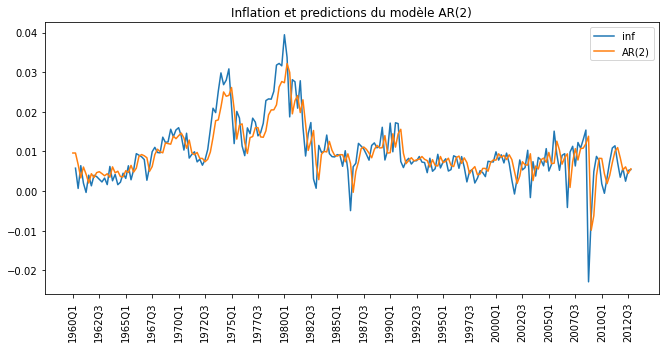

In [59]:
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"], label="inf")
plt.plot(df["DATE"], preds, label="AR(2)")
plt.title("Inflation et predictions du modèle AR(2)")
plt.legend()
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

##### 9. Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante

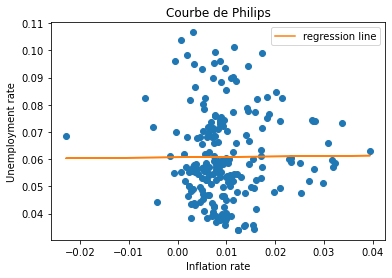

In [60]:
# on passe la variable `Unemp` à la même échelle que `inf`
df.loc[:, "Unemp"] = df["Unemp"] / 100
X9 = inf
y9 = df["Unemp"].iloc[1:]
X9 = sm.add_constant(X9)
model9 = sm.OLS(y9, X9)
results9 = model9.fit()
preds = model9.predict(results9.params, X9)

plt.figure(figsize=(6,4))
plt.scatter(inf, y9)
plt.plot(inf, preds, color="C1", label="regression line")
plt.title("Courbe de Philips")
plt.xlabel("Inflation rate")
plt.ylabel("Unemployment rate")
plt.legend()
plt.show()

##### 10. Tester l’autocorrélation des erreurs.

Pour tester l'autocorrélation des erreurs, on définit le modèle autorégressif suivant : $u_t = \rho u_{t-1} + \epsilon$ où $u_t$ est le résidu au temps $t$.

On teste l'hypothèse $H_0 : \rho = 0$ avec un test de Student.

In [61]:
u = results9.resid.iloc[1:]
X10 = results9.resid.shift(1).iloc[1:]

model10 = sm.OLS(u, X10)
results10 = model10.fit()
print(results10.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Tue, 10 May 2022   Prob (F-statistic):                   6.88e-144
Time:                        11:38:29   Log-Likelihood:                          896.68
No. Observations:                 210   AIC:                                     -1791.
Df Residuals:                     209   BIC:                                     -1788.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Comme indiqué dans le résumé du modèle OLS de *statsmodels*, la p-valeur du test de Student pour le coéfficient du modèle est 0.000 donc on peut rejeter l'hypothèse nulle à 1%. Les erreurs sont autocorrélées.

##### 11. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

In [62]:
rho = results10.params[0]
y11 = df["Unemp"] - rho * df["Unemp"].shift(1)
y11 = y11.iloc[2:]
X11 = df["inf"] - rho * df["inf"].shift(1)
X11 = X11.iloc[2:]
X11 = sm.add_constant(X11)

model11 = sm.OLS(y11, X11)
results11 = model11.fit()
print(results11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Tue, 10 May 2022   Prob (F-statistic):             0.0236
Time:                        11:38:29   Log-Likelihood:                 900.29
No. Observations:                 210   AIC:                            -1797.
Df Residuals:                     208   BIC:                            -1790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.000      5.909      0.0

##### 12. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

Il s'agit de réaliser un Test de Chow:
* Modèle contraint : régression sur l'ensemble de la période -> $SSR1$
* 2 modèles non-contraints : régressions sur les sous-périodes -> $SSR0_{total} = SSR0_1 + SSR0_2$.

* L'hypothèse nulle $H_0$ est que les coéfficients de régression des 3 modèles sont les mêmes.

* On calcul la statistique de Fisher : $F = \frac{(SSR0_{total} - SSR1) / c}{ SSR0_{total} / ddl}$
avec $ddl = n-2(p+1)$ et restrictions : $c = p + 1$.

In [63]:
from scipy.stats import f

def calc_ssr(X, y):
    """
    Caclul de la somme des résidus au carré
    """
    model = sm.OLS(y, X).fit()
    u = model.resid
    SSR = u.T @ u
    return SSR

def calc_fisher(SSR0, SSR1, c, ddl):
    """
    Calcul de la statistique de Fisher avec `c` nombre de contraintes
    et `ddl` nombre de degrés de liberté du modèle non contraint
    """
    F = ((SSR1 - SSR0)/c) / (SSR0/ddl)
    p_val = f.sf(F, c, ddl)
    print(f"F-stat : {F:.3f}, p-value : {p_val:.2e}")
    return F, p_val

def fisher_test(X, y, constrained_cols, q):
    """
    Test de Fisher avec contrainte sur les variables `constrained_cols`
    et niveau de confiance `q`.
    """
    n, p = X.shape
    # on calcule la somme des carrés des résidus du modèle non contraint
    SSR0 = calc_ssr(X, y)
    # colonnes du modèle contraint
    new_cols = list(set(X.columns) - set(constrained_cols))
    # modèle contraint
    X1 = X.loc[:, new_cols]
    SSR1 = calc_ssr(X1, y)
    c = len(constrained_cols) # nombre de contraintes
    ddl = n - p # dégrés de liberté
    # Stat de Fisher
    F, p_val = calc_fisher(SSR0, SSR1, c, ddl)
    perc = f.ppf(q, c, ddl)
    if perc < F:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on rejette H0")
    else:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on ne rejette pas H0")

In [64]:
def chow_test(X, y):
    # modèle contraint
    model1 = sm.OLS(y, X).fit()
    SSR1 = model1.resid.T @ model1.resid
    # point de split du dataset en 2 parts égales
    split_point = X.shape[0] // 2
    X1 = X.iloc[:split_point]
    y1 = y.iloc[:split_point]
    X2 = X.iloc[split_point:]
    y2 = y.iloc[split_point:]
    # résidus des 2 sous-modèles non-contraints 
    SSR0_1 = calc_ssr(X1, y1)
    SSR0_2 = calc_ssr(X2, y2)
    # nombre de restrictions:
    c = X.shape[1]
    ddl = X.shape[0] - 2 * c
    # stat de Fisher et p-value
    F, p_val = calc_fisher(SSR0_1+SSR0_2, SSR1, c, ddl)
    if p_val < 0.05:
        print("On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%")
    else:
        print("On ne rejette par l'hypothèse nulle à 5%")
    return F, p_val

In [65]:
# en repartant du modèle de la question 11
_ = chow_test(X11, y11)

F-stat : 4.478, p-value : 1.25e-02
On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%


In [66]:
# en repartant du modèle de la question 9
_ = chow_test(X9, y9)

F-stat : 1.942, p-value : 1.46e-01
On ne rejette par l'hypothèse nulle à 5%


##### 13. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [67]:
X13 = df[["inf", "Unemp"]]
X13 = pd.concat([X13.shift(i) for i in range(1,5)], axis=1).iloc[5:]
cols = []
for i in range(1,5):
    cols.append(f"inf_{i}")
    cols.append(f"Unemp_{i}")
X13.columns = cols
X13 = sm.add_constant(X13)

y13 = df["Unemp"].iloc[5:]

X13

,const,inf_1,Unemp_1,inf_2,Unemp_2,inf_3,Unemp_3,inf_4,Unemp_4
5,1.0,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553,0.005782,0.0523
6,1.0,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553
7,1.0,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627
8,1.0,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680
9,1.0,0.004001,0.0563,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700
...,...,...,...,...,...,...,...,...,...
207,1.0,0.007169,0.0900,0.011440,0.0903,0.010881,0.0900,0.007477,0.0953
208,1.0,0.003493,0.0867,0.007169,0.0900,0.011440,0.0903,0.010881,0.0900
209,1.0,0.005728,0.0827,0.003493,0.0867,0.007169,0.0900,0.011440,0.0903
210,1.0,0.002497,0.0817,0.005728,0.0827,0.003493,0.0867,0.007169,0.0900


Coéfficients de régression:
 const      0.001457
inf_1      0.031105
Unemp_1    1.593705
inf_2     -0.023578
Unemp_2   -0.647169
inf_3      0.068949
Unemp_3    0.022248
inf_4      0.016329
Unemp_4   -0.007975
dtype: float64


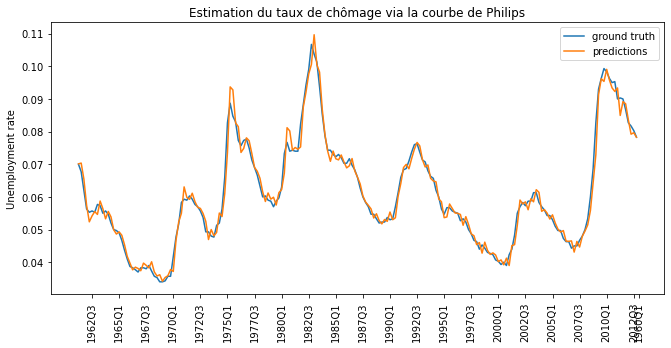

In [68]:
model13 = sm.OLS(y13, X13)
results13 = model13.fit()
preds = model13.predict(results13.params, X13)
print("Coéfficients de régression:\n",results13.params)

plt.figure(figsize=(11,5))
plt.plot(df["DATE"].iloc[5:], y13, label="ground truth")
plt.plot(df["DATE"].iloc[5:], preds, color="C1", label="predictions")
plt.title("Estimation du taux de chômage via la courbe de Philips")
#plt.xlabel("")
plt.ylabel("Unemployment rate")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.legend()
plt.show()

On réalise le test de Granger. Il s'agit d'un test de Fisher avec pour paramètres :
* $H_0$ : les variables liées à l'inflation ne sont pas significatives pour le modèle (ie non causalité de l'inflation sur le chômage)
* modèle non contraint : on prend en compte toutes les variables
* modèle contraint : on retire les variables liées à l'inflation

In [69]:
fisher_test(X13, y13, [f"inf_{i}" for i in range(1,5)], 0.95)

F-stat : 3.797, p-value : 5.35e-03
Avec seuil de significativité de 5.00%, on rejette H0


##### 14. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

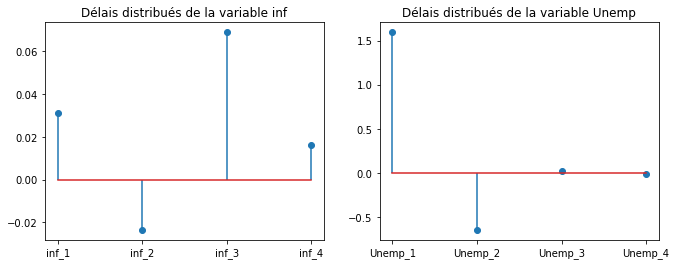

In [70]:
inf_coef = [results13.params[f"inf_{i}"] for i in range(1,5)]
inf_tick = [col for col in X13.columns if "inf" in col]
unemp_coef = [results13.params[f"Unemp_{i}"] for i in range(1,5)]
unemp_tick = [col for col in X13.columns if "Unemp" in col]

fig, axes = plt.subplots(1,2, figsize=(11,4))
axes[0].stem(inf_tick, inf_coef)
axes[0].set_xticklabels(inf_tick)
axes[0].set_title("Délais distribués de la variable inf")

axes[1].stem(unemp_tick, unemp_coef)
axes[1].set_xticklabels(unemp_tick)
axes[1].set_title("Délais distribués de la variable Unemp")

plt.show()

Pour le modèle,
$$
y_t = \beta_0 + \sum_{k=1}^{4} \beta_k y_{t-k} + \sum_{j=1}^{4}\alpha_j x_{t-j} + u_t
$$
le coéfficient long-terme de $x$ sur $y$ est : $$\theta = \frac{\sum_{j=1}^4 \alpha_j}{1 - \sum_{k=1}^4 \beta_k}$$

In [71]:
theta = np.sum(inf_coef) / (1- np.sum(unemp_coef))

print(f"Coéfficient long terme de l'inflation sur le chômage: {theta:.3f}")

Coéfficient long terme de l'inflation sur le chômage: 2.368
